Fatemeh Zahedi HW4 1215240130 STP 598

-----
Problem 1

$y_i$ ~ $Poisson(\lambda)$
$\\P(Y=y|\lambda)=\frac{e^{-\lambda} \, \lambda^{y_i}}{y_i!}$
$\\ P(y_1,y_2,...,y_n;\lambda)={\Pi}\frac{e^{-\lambda} \, \lambda^{y_i}}{y_i!}$
$\\ lnP=ln({\Pi}\frac{e^{-\lambda} \, \lambda^{y_i}}{y_i!})$
$\\ lnP={\Sigma}ln(\frac{e^{-\lambda} \, \lambda^{y_i}}{y_i!})$
$\\ lnP={\Sigma}(ln(\lambda^{y_i})+ln(e^{-\lambda})-ln({y_i!}))$
$\\ lnP={\Sigma}({y_i}ln(\lambda)-\lambda-ln({y_i!}))$
$\\ lnP=-n\lambda+ln(\lambda){\Sigma}{y_i}-{\Sigma}ln({y_i!})$
$\\ \frac{d}{d\lambda}lnP=\frac{d}{d\lambda}(-n\lambda+ln(\lambda){\Sigma}{y_i}-{\Sigma}ln({y_i!}))$
$\\ \frac{d}{d\lambda}lnP=-n+\frac{1}{\lambda}{\Sigma}(y_i)$
$\\ -n+\frac{1}{\lambda}{\Sigma}(y_i)=0$
$\\ {\lambda}=\frac{1}{n}{\Sigma}(y_i)$

-------------
Problem 2

$\underset{\omega}min Var(P)=\underset{\omega}{min} \omega'\Sigma\omega$
$\\s.t.$  $\\\omega'1=1$
Using the Lagrange problem then
$\\L(\lambda,\omega)=\omega'\Sigma\omega+\lambda(1-\omega'1)$
First order conditions of the Lagrangian problem are
$\\ \Sigma\omega-\lambda1=0$
$\\ \omega'1=1$
from the first equation we have
$\\ \Sigma\omega = \lambda1$
$\\ \omega = \lambda\Sigma^{-1}1$
Also we have
$\\ \omega1=1$
then
$\\ \lambda1'\Sigma^{-1}1=1$
$\\ \lambda=\frac{1}{1'\Sigma^{-1}1}$
therefore, the weights of the global-minimum variance portfolio is
$\\ \omega^{*}=\frac{1}{1'\Sigma^{-1}1}\Sigma^{-1}1$
And finally the variance of the global-minimum variance portfolio is
$\\ Var(\omega^{*}) =\omega^{*}\Sigma\omega^{*}$
$\\ Var(\omega^{*}) = \frac{1}{(1'\Sigma^{-1}1)^{2}}1'\Sigma^{-1}\Sigma\Sigma^{-1}1=\frac{1}{1'\Sigma^{-1}1}$


-------------
Problem 3

In [96]:
### imports
import numpy as np
import pandas as pd
import math
import scipy as sp
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [59]:
cd = pd.read_csv("http://www.rob-mcculloch.org/data/susedcars.csv")
cd = cd[['price','mileage','year']]
cd['price'] = cd['price']/1000
cd['mileage'] = cd['mileage']/1000
X = cd.iloc[:,[1]].to_numpy()
y = cd['price'].to_numpy()

Text(0, 0.5, 'BIC')

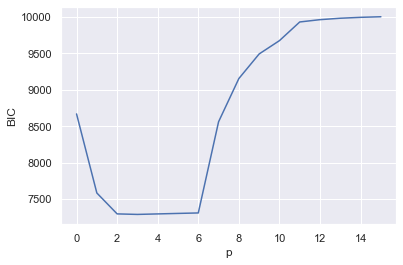

In [94]:
BIC = np.zeros(16)
for p in range(0,16):
    poly_reg=PolynomialFeatures(degree=p)
    X_poly=poly_reg.fit_transform(X)
    lin_reg2=LinearRegression()
    lin_reg2.fit(X_poly,y)
    results = sm.OLS(y, X_poly).fit()
    BIC[p]=results.bic
plt.plot(BIC)
plt.xlabel('p'); plt.ylabel('BIC')

In [ ]:
This plot suggests p of about 3

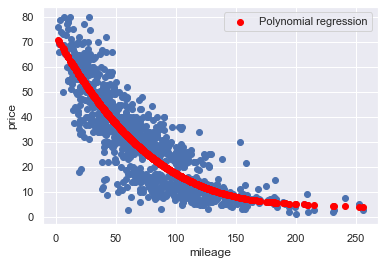

In [92]:
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)
ypredictedreg = lin_reg2.predict(X_poly)
plt.scatter(X,y)
plt.scatter(X,ypredictedreg,c='red',label="Polynomial regression") #add the line
plt.xlabel('mileage'); plt.ylabel('price')
plt.legend()

In [91]:
results = sm.OLS(y, X_poly).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1015.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):          2.47e-302
Time:                        15:58:57   Log-Likelihood:                -3631.0
No. Observations:                1000   AIC:                             7270.
Df Residuals:                     996   BIC:                             7290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.4591      1.296     55.920      0.0

Text(0, 0.5, 'BIC')

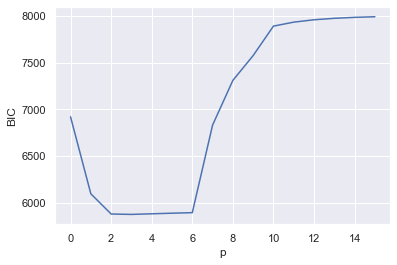

In [97]:
rng = np.random.RandomState(34)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=rng, test_size=.2)
BIC = np.zeros(16)
for p in range(0,16):
    poly_reg=PolynomialFeatures(degree=p)#, interaction_only=True)
    X_poly=poly_reg.fit_transform(Xtrain)
    # poly_reg.fit(X_poly,y)
    lin_reg2=LinearRegression()
    lin_reg2.fit(X_poly,ytrain)
    results = sm.OLS(ytrain, X_poly).fit()
    BIC[p]=results.bic
#results.bic
#print(results.summary())
plt.plot(BIC)
plt.xlabel('p'); plt.ylabel('BIC')

In [ ]:
This plot suggests p of about 3. So out of sample also suggest the similar p.

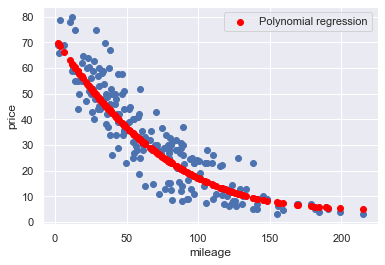

In [98]:
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(Xtrain)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,ytrain)
X_polytest=poly_reg.fit_transform(Xtest)
ypredictedtest = lin_reg2.predict(X_polytest)
plt.scatter(Xtest,ytest)
plt.scatter(Xtest,ypredictedtest,c='red',label="Polynomial regression") #add the line
plt.xlabel('mileage'); plt.ylabel('price')
plt.legend()

------------
Problem 4

In [156]:
import numpy as np
import pandas as pd
import math
import scipy as sp
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error

In [110]:
cd = pd.read_csv("http://www.rob-mcculloch.org/data/usedcars.csv")
cd.shape
#print(cd.describe())
cd.head()

price trim isOneOwner   mileage  year   color  displacement      fuel  \
0   2988  320          f  193296.0  1995   Black           3.2  Gasoline   
1   6595  320          f  129948.0  1995   other           3.2  Gasoline   
2   7993  320          f  140428.0  1997   White           3.2  Gasoline   
3   5995  420          f  113622.0  1999  Silver           4.2  Gasoline   
4   3000  420          f  167673.0  1999  Silver           4.2  Gasoline   

  region soundSystem wheelType  
0    SoA        unsp     Alloy  
1    Mid     Premium     Alloy  
2    Mid        Bose     Alloy  
3    Mid        unsp     Alloy  
4    SoA        unsp     Alloy

In [151]:
#cd1 = cd1.iloc[:,[3,4,5,0]]
one_hot = LabelBinarizer()
cdumstrim = one_hot.fit_transform(cd['trim'])
cdumsowner = one_hot.fit_transform(cd['isOneOwner'])
cdumscolor = one_hot.fit_transform(cd['color'])
cd['displacement'] = cd['displacement'].apply(str)
cdumsdis = one_hot.fit_transform(cd['displacement'])
cdumsfuel = one_hot.fit_transform(cd['fuel'])
cdumsregion = one_hot.fit_transform(cd['region'])
cdumssound = one_hot.fit_transform(cd['soundSystem'])
cdumswheel = one_hot.fit_transform(cd['wheelType'])
cd['mileage']=cd['mileage']/1000
cd['price'] = cd['price']/1000
features = np.hstack([cd.iloc[:,3:5].to_numpy(),cdumstrim,cdumsowner,cdumscolor,cdumsdis,cdumsfuel,cdumsregion,cdumssound,cdumswheel])
y = np.log(cd['price'].to_numpy())
print(features.shape)
print(y.shape)

(20063, 55)
(20063,)


In [153]:
scl = StandardScaler()
X = scl.fit_transform(features)
# print("means should be 0, sds should be 1")
# print(X.mean(axis=0))
# print(X.std(axis=0))

4.415642421548641e-78


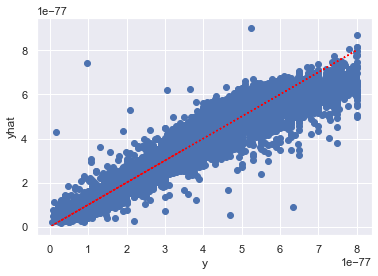

In [172]:
lmod = LinearRegression()
lmod.fit(X,y)

yhatl = lmod.predict(X)

### plot y vs yhat
plt.scatter(np.exp(y),np.exp(yhatl))
plt.xlabel('y'); plt.ylabel('yhat')
plt.plot(np.exp(y),np.exp(y),c='red',linestyle='dotted')
error = math.sqrt(mean_squared_error(np.exp(y),np.exp(yhatl)))
print(error)

number of alphas used: 100
best alpha:  0.0006964930805991679
coeficients at best alpha:  [-0.21431235  0.39427668 -0.03207067  0.         -0.         -0.02396797
 -0.09879304 -0.06768093 -0.          0.05283455  0.02246975  0.07239477
  0.05440884  0.00133789  0.00075005 -0.00479881 -0.         -0.00260365
  0.01295172 -0.0006267   0.00104352 -0.         -0.          0.00384202
 -0.02766632 -0.         -0.          0.01158524 -0.         -0.
  0.02899085 -0.01885931  0.          0.00293886  0.01243492 -0.
 -0.         -0.00665241  0.00557952 -0.00972578  0.          0.
  0.01025746 -0.          0.00211221 -0.0014093   0.00447803 -0.
 -0.00088858 -0.          0.00254292 -0.          0.00061906 -0.00106945
  0.        ]
number of 0 coefficents:  20


Text(0, 0.5, 'mse')

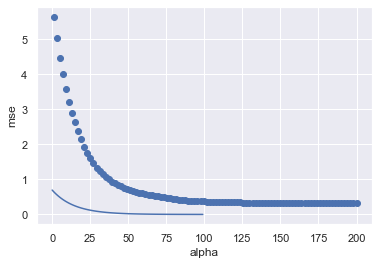

In [161]:
## lasso
alphas = np.linspace(start=1,stop=200,num=100)
lcv = LassoCV(cv=10)
lcv.fit(X,y)

# look at alphas used
print("number of alphas used:",lcv.n_alphas)
pd.Series(lcv.alphas_).describe()

plt.plot(lcv.alphas_)

#best alpha and coefficients
print("best alpha: ",lcv.alpha_)

#coefficents
print("coeficients at best alpha: ",lcv.coef_)
print("number of 0 coefficents: ",np.sum(lcv.coef_ == 0))

#fitted values
yhatL = lcv.predict(X)

#mse
msep = lcv.mse_path_
mses = msep.sum(axis=1)
plt.scatter(alphas,mses)
plt.xlabel('alpha'); plt.ylabel('mse')

4.395477952261502e-78


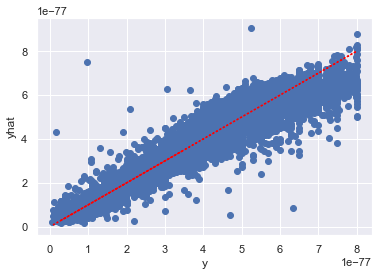

In [170]:
plt.scatter(np.exp(y),np.exp(yhatL))
plt.xlabel('y'); plt.ylabel('yhat')
plt.plot(np.exp(y),np.exp(y),c='red',linestyle='dotted')
error = math.sqrt(mean_squared_error(np.exp(y),np.exp(yhatL)))
print(error)

(100,)
(55, 100)
(100,)


Text(0, 0.5, 'coefficent')

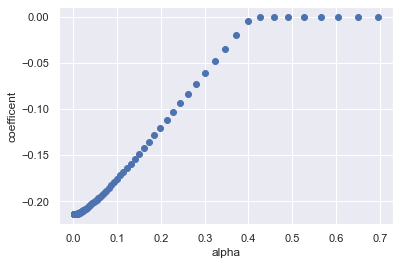

In [166]:
## Lasso path
Lpath = lcv.path(X,y)
for i in range(3):
   print(Lpath[i].shape)

kk = 0 ## choose which coefficient to plot
plt.scatter(Lpath[0],Lpath[1][kk,:])
plt.xlabel('alpha'); plt.ylabel('coefficent')

In [163]:
##ridge
rcv = RidgeCV(alphas,cv=10)
rcv.fit(X,y)
print(rcv.alpha_)
print(rcv.coef_)
yhatr = rcv.predict(X)

9.04040404040404
[-2.14192886e-01  3.91096226e-01 -1.70801751e-02 -8.70447200e-04
 -1.19603145e-02 -1.30001815e-02 -5.09527279e-02 -3.54883183e-02
 -4.69601608e-04  3.13650105e-02  1.65298681e-02  6.51098834e-02
  5.55793976e-02  2.08419793e-03 -6.61483411e-04 -6.18126603e-03
 -1.52700797e-03 -4.54367987e-03  1.23474786e-02 -2.00632745e-03
  1.07738335e-03 -1.38587242e-02 -1.70801751e-02  2.26006701e-02
 -2.82492355e-02 -1.30001815e-02 -5.09527279e-02  2.74106649e-02
 -3.54883183e-02 -4.69601608e-04  4.97631129e-02 -1.75548924e-02
 -9.39924778e-04  9.89672506e-03  2.20131192e-02 -6.89744910e-03
 -1.19603145e-02 -7.04546116e-03  6.32567142e-03 -1.01790318e-02
  8.01473992e-04  4.81716737e-04  1.10314528e-02  1.29485306e-04
  2.89424696e-03 -1.81986141e-03  5.00799858e-03 -4.44791868e-05
 -2.52990408e-03 -9.80643812e-04  2.25024286e-03 -6.96497617e-05
  1.27223796e-03 -1.87074554e-03 -1.00496464e-05]


4.388250277253534e-78


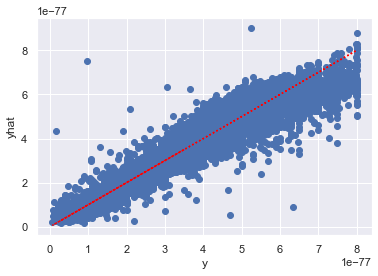

In [171]:
plt.scatter(np.exp(y),np.exp(yhatr))
plt.xlabel('y'); plt.ylabel('yhat')
plt.plot(np.exp(y),np.exp(y),c='red',linestyle='dotted')
error = math.sqrt(mean_squared_error(np.exp(y),np.exp(yhatr)))
print(error)

In [167]:
## look
pyhat = pd.DataFrame({'y':y,'yhatl':yhatl,'yhatr':yhatr,'yhatLasso':yhatL})
pyhat.corr()


y     yhatl     yhatr  yhatLasso
y          1.000000  0.971089  0.971166   0.971115
yhatl      0.971089  1.000000  0.999919   0.999872
yhatr      0.971166  0.999919  1.000000   0.999948
yhatLasso  0.971115  0.999872  0.999948   1.000000

Comparing mean squared error of these three methods, ridge performed better than the others.